# PHY2200 Final Project #
### By Scott Colton ###

## Machine Learning and Brownian Motion ##

For this project, I wanted to explore techniques with machine learning to gain knowledge in a new field that I have been interested in. I spent the first half of my project researching CNNs, convolutional neural networks. Dr. Titus allowed me to study a project that was previously completed for this class that used a convolutional neural network to identify vowels. After learning how CNNs worked, I had to find a place for me to apply them.

## Convolutional Nueral Networks ##

A convolutional neural network is a type of machine learning that is very useful for image recognition and pixel data. CNNs and other neural networks are modeled after the way that the brain communicates. That is a system of nodes, called neurons, that are all communicating with one another. The communications goal is to optimise the final output. The basic set up of a CNN looks like this

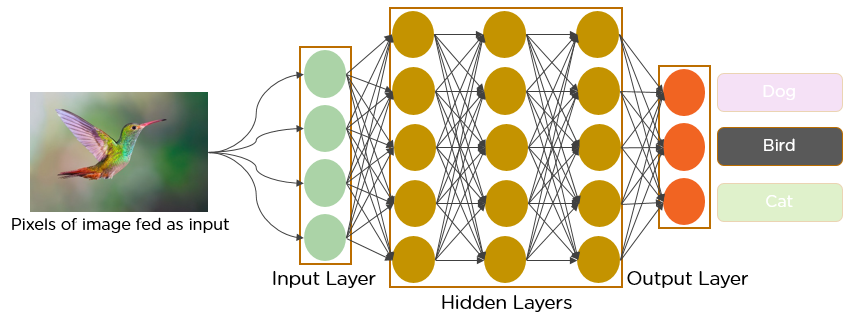

As you can see the neurons talk to the neurons in the next hidden layer, but they do not transmit the whole image with every communication. They only transmit the parts that are relevant to the optimization of the output. They do this by applying filters. Each of the hidden layers represents a filter that is being added, this is what separates a CNN from a regular artificial neural network.

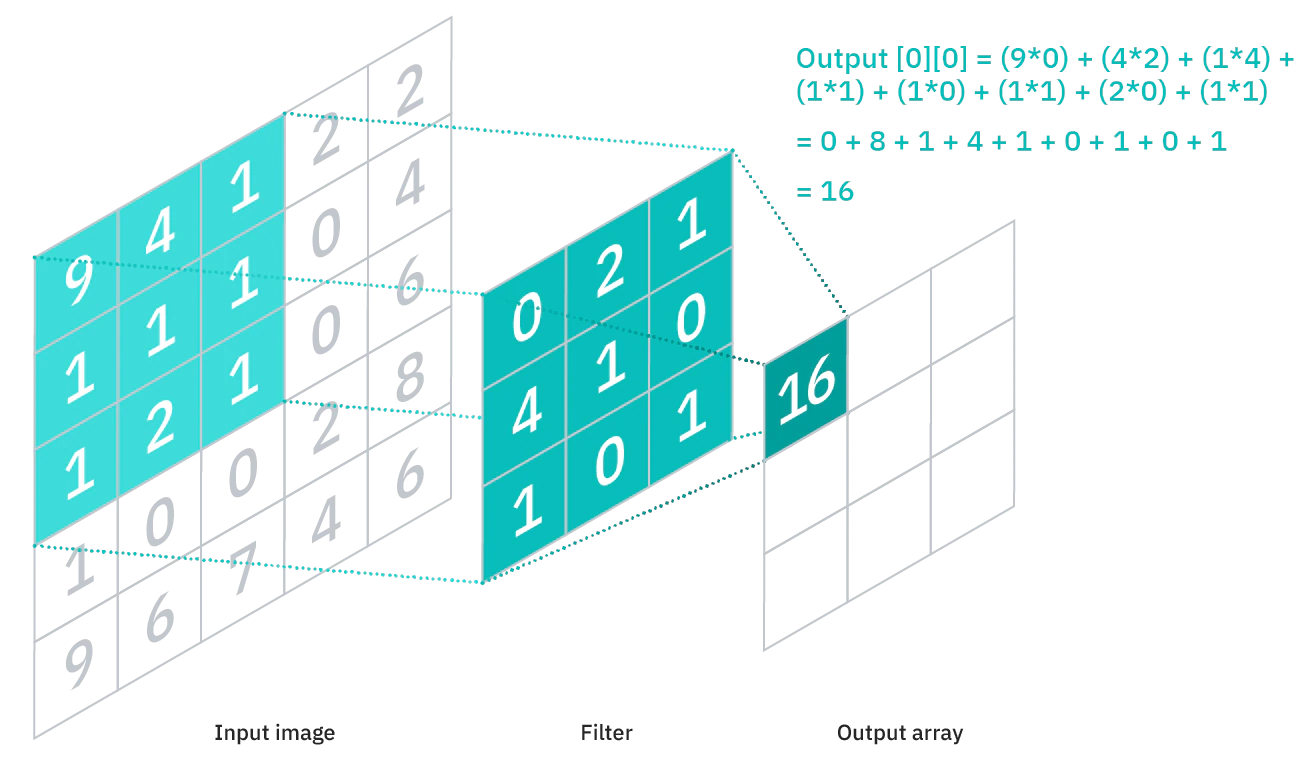

# Application #
## Browninan Motion ##

Brownian motion is the term used to describe the random diffusion of particles in a fluid at a given temperature. The diffusion is caused by the thermal energy of the fluid surrounding the particles. The diffusion from brownian motion is effectively random but it is not without pattern. As the particles diffuse over time, t, the RMS displacement follows a linear rate of t at the start and then falls off to $\sqrt{t}$ later on.

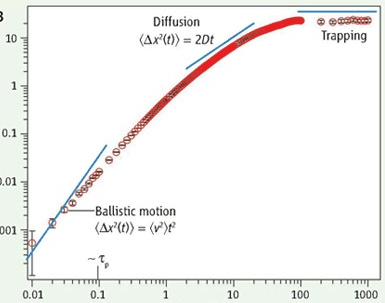

<IPython.core.display.Javascript object>


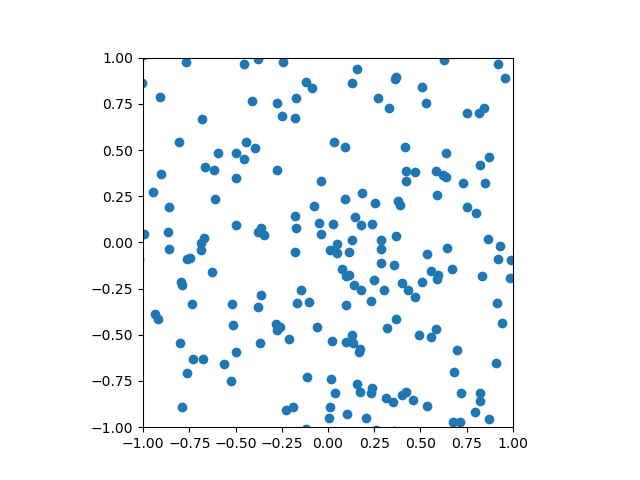

((-1.0, 1.0), (-1.0, 1.0), None)

In [1]:
import numpy as np, random as rnd
import matplotlib.pyplot as plt
import matplotlib.animation as am
%matplotlib notebook

class BrownianMotion:               # Brownian motion class
    def __init__(self, N=400, F=0.005, b=0.1, tau=2., h = 0.5):
        self.N, self.F, self.b, self.tau, self.h = N, F, b, tau, h
        self.r, self.v = np.zeros((N, 2)), np.zeros((N, 2))
        self.t = -np.log(np.random.rand(N))*tau     # initial kick times

    def move(self, r, v, dt):       # move between kicks
        edt = np.exp(-self.b*dt)
        return r + v*(1-edt)/self.b, v*edt

    def iterate(self):              # advance one step
        r, v, t, h, F = self.r, self.v, self.t, self.h, self.F  # alias
        for i in range(self.N):
            if t[i] > h:            # no kick within current step
                dt = h              # dt= time to end of step
            else:                   # suffers kicks before end of step
                tot, dt = 0., t[i]  # tot=time to last kick
                while t[i] <= h:
                    r[i], v[i] = self.move(r[i], v[i], dt)
                    phi = rnd.random()*2*np.pi              # apply kick
                    v[i] += [F*np.cos(phi), F*np.sin(phi)] 
                    tot += dt
                    dt = -np.log(rnd.random())*self.tau     # sample dt
                    t[i] += dt      # next kick
                dt = h - tot        # dt= to end of current step
            r[i], v[i] = self.move(r[i], v[i], dt)  # no kick, just move
            t[i] -= h
 
def updatefig(*args):                       # update figure data
    bm.iterate()
    plot.set_data(bm.r[:,0], bm.r[:,1])     # update data
    return [plot]                           # return plot object
 
bm = BrownianMotion()                       # create Brownian model
fig = plt.figure()
plt.subplot(111, aspect='equal')
plot = plt.plot(bm.r[:,0], bm.r[:,1], 'o')[0]     # create plot object
ani = am.FuncAnimation(fig, updatefig, interval=10, blit=True) # animate 
plt.xlim(-1., 1.), plt.ylim(-1., 1.), plt.show()

Using this animation and the data generated from that code, we can create images to train the CNN. Even though the diffusion is random, the clustering and number of particles in each section of the graph would work well with the filtering method of a CNN. Examples of images that would be sent thorugh, with their respective time passed for training would look like these.

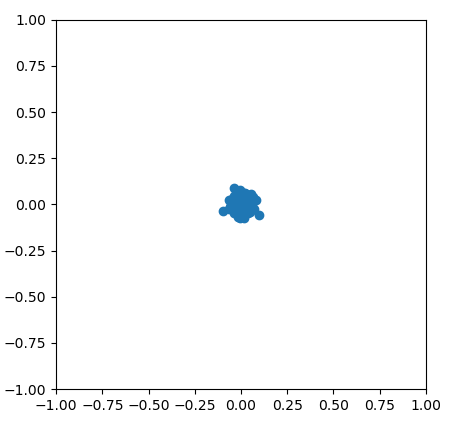
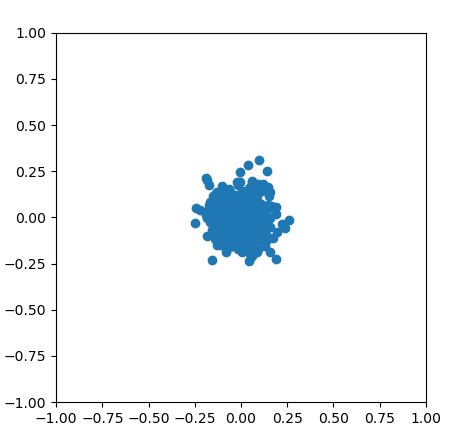
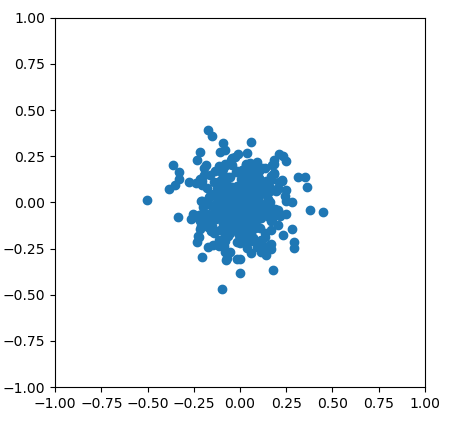
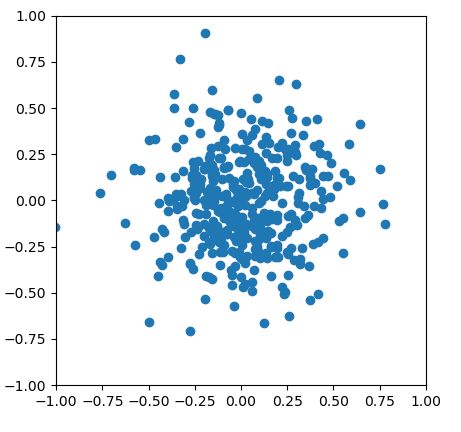